In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts_hc = np.load('ts_hc.npy')
ts_schz = np.load('ts_schz.npy')

In [4]:
ts_hc = ts_hc.reshape(52,142*118)

In [5]:
ts_schz = ts_schz.reshape(50,142*118)

In [6]:
corr_hc = np.load('corr_hc.npy')
corr_schz = np.load('corr_schz.npy')

In [7]:
corr_hc = corr_hc.reshape(52,118*118)
corr_schz = corr_schz.reshape(50,118*118)

In [8]:
hc = np.append(ts_hc,corr_hc,axis=1)
schz = np.append(ts_schz,corr_schz,axis=1)

In [9]:
X = np.append(hc,schz,axis=0)

In [10]:
X.shape

(102, 30680)

In [11]:
X[0].shape

(30680,)

In [12]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [13]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [15]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [16]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [17]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [18]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.533095 (0.192870)
SVM: 0.701548 (0.141779)
KNN: 0.735952 (0.131182)
LR: 0.697381 (0.142105)
MLP: 0.671071 (0.129800)
RF: 0.678929 (0.138983)
ET: 0.683869 (0.197006)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948848, p:0.006313
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.594420, p:0.733602
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

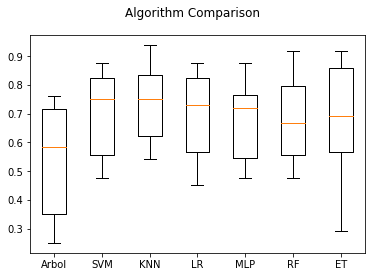

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.510119 (0.277742)
SVM: 0.633333 (0.235510)
KNN: 0.740000 (0.156915)
LR: 0.640476 (0.244833)
MLP: 0.662381 (0.251133)
RF: 0.645476 (0.207732)
ET: 0.648333 (0.246582)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943628, p:0.003411
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.524770, p:0.787407
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

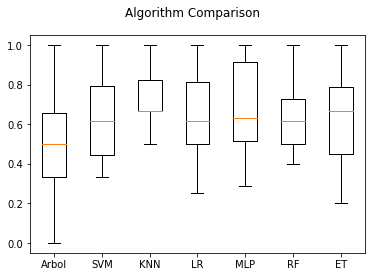

In [20]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.580952 (0.278317)
SVM: 0.733333 (0.242705)
KNN: 0.716071 (0.222623)
LR: 0.714286 (0.202801)
MLP: 0.585714 (0.256536)
RF: 0.654762 (0.224934)
ET: 0.663095 (0.276439)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.930038, p:0.000749
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.410857, p:0.869154
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

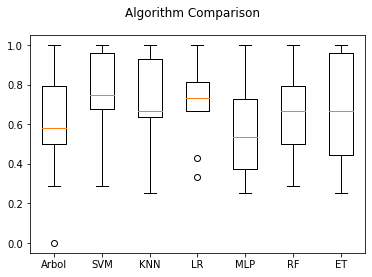

In [21]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.528182 (0.162086)
SVM: 0.658182 (0.130555)
KNN: 0.725455 (0.114690)
LR: 0.667273 (0.124063)
MLP: 0.636364 (0.125441)
RF: 0.638182 (0.137739)
ET: 0.635455 (0.191404)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951589, p:0.008790
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.571570, p:0.751433
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

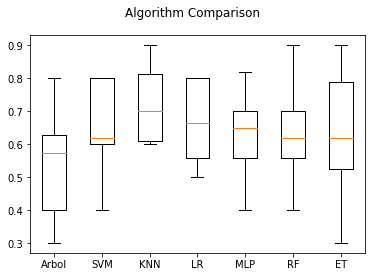

In [22]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 2 components

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(X)

PCA(n_components=2)

In [26]:
X_pca2 = pca.transform(X)

In [27]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.656250 (0.145214)
SVM: 0.660119 (0.148773)
KNN: 0.683333 (0.119406)
LR: 0.570655 (0.189687)
MLP: 0.562798 (0.159699)
RF: 0.665000 (0.195295)
ET: 0.652798 (0.206166)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.959847, p:0.024554
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.348991, p:0.907905
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

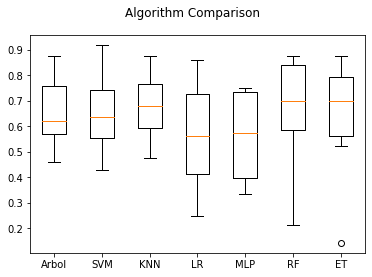

In [28]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.645000 (0.244501)
SVM: 0.622857 (0.258144)
KNN: 0.758333 (0.242813)
LR: 0.561190 (0.213475)
MLP: 0.477857 (0.327521)
RF: 0.643333 (0.166032)
ET: 0.614286 (0.195041)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951006, p:0.008189
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.300090, p:0.270280
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

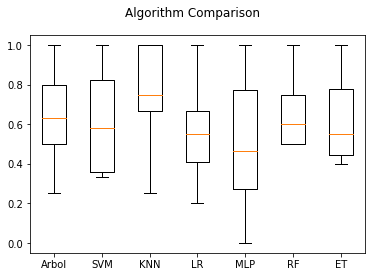

In [29]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.547619 (0.223923)
SVM: 0.707143 (0.177153)
KNN: 0.583333 (0.160780)
LR: 0.580952 (0.232603)
MLP: 0.510119 (0.330666)
RF: 0.664286 (0.214867)
ET: 0.725000 (0.188791)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.950170, p:0.007401
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.817651, p:0.560363
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

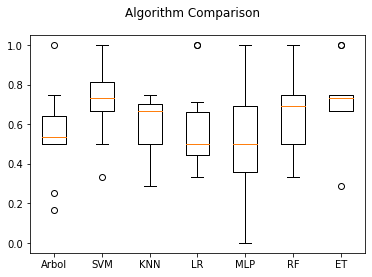

In [30]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.644545 (0.131893)
SVM: 0.655455 (0.117371)
KNN: 0.693636 (0.133240)
LR: 0.557273 (0.132056)
MLP: 0.546364 (0.133698)
RF: 0.664545 (0.152362)
ET: 0.634545 (0.170841)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.941527, p:0.002676
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.092777, p:0.996855
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

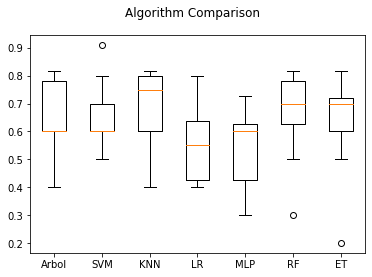

In [31]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 10 components

In [32]:
pca = PCA(n_components=10)

In [33]:
pca.fit(X)

PCA(n_components=10)

In [34]:
X_pca10 = pca.transform(X)

In [35]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.554821 (0.142564)
SVM: 0.687976 (0.146808)
KNN: 0.600298 (0.134002)
LR: 0.742024 (0.098265)
MLP: 0.647381 (0.121114)
RF: 0.636964 (0.159041)
ET: 0.602857 (0.135948)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.955169, p:0.013647
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.579806, p:0.745021
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

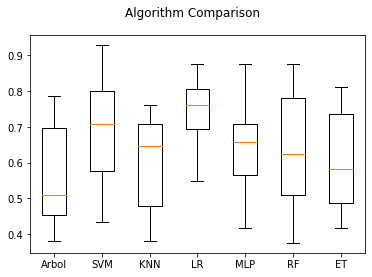

In [36]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.527381 (0.261071)
SVM: 0.653095 (0.207801)
KNN: 0.546905 (0.189275)
LR: 0.704167 (0.182774)
MLP: 0.629286 (0.204494)
RF: 0.628095 (0.242833)
ET: 0.588889 (0.225257)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.953102, p:0.010574
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.161071, p:0.986019
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

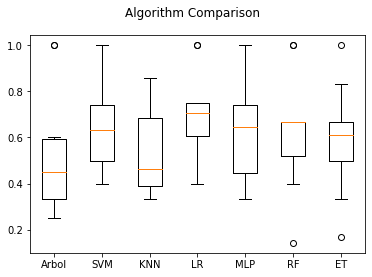

In [37]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.533333 (0.210603)
SVM: 0.699405 (0.160499)
KNN: 0.820238 (0.163356)
LR: 0.755952 (0.158136)
MLP: 0.698214 (0.186606)
RF: 0.610714 (0.180077)
ET: 0.616667 (0.192975)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.954985, p:0.013339
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.265182, p:0.951085
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

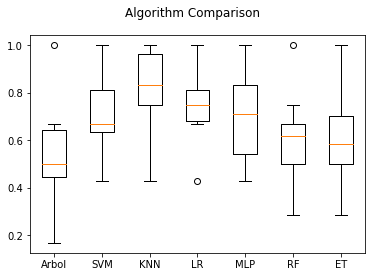

In [38]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.510000 (0.096505)
SVM: 0.668182 (0.134487)
KNN: 0.570000 (0.128504)
LR: 0.725455 (0.095675)
MLP: 0.637273 (0.133698)
RF: 0.607273 (0.160824)
ET: 0.577273 (0.135650)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939325, p:0.002082
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.638973, p:0.698580
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

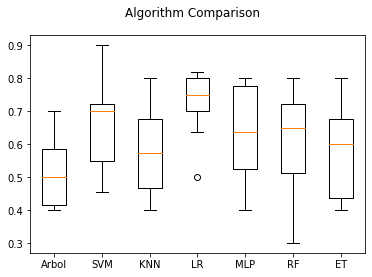

In [39]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [40]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [41]:
pca = PCA(n_components=100)

In [42]:
pca.fit(X)

PCA(n_components=100)

In [43]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.486250 (0.164736)
SVM: 0.720298 (0.158374)
KNN: 0.738810 (0.135382)
LR: 0.717024 (0.138283)
MLP: 0.554226 (0.138358)
RF: 0.536429 (0.125664)
ET: 0.527024 (0.145345)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979387, p:0.302334
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.284352, p:0.942293
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

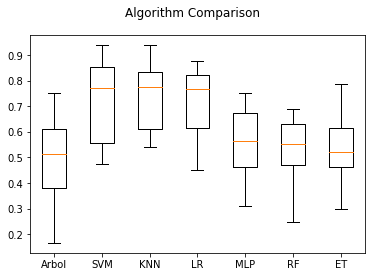

In [44]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.462500 (0.264975)
SVM: 0.665476 (0.227156)
KNN: 0.748333 (0.155000)
LR: 0.665476 (0.266542)
MLP: 0.538571 (0.262030)
RF: 0.573333 (0.292494)
ET: 0.403968 (0.291547)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.942946, p:0.003151
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.526562, p:0.786047
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

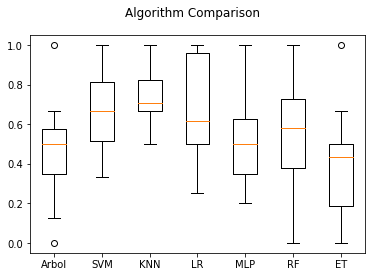

In [45]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.451190 (0.227530)
SVM: 0.733333 (0.242705)
KNN: 0.701786 (0.235649)
LR: 0.703571 (0.198381)
MLP: 0.529762 (0.209284)
RF: 0.458929 (0.295714)
ET: 0.495238 (0.391383)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.942648, p:0.003045
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.792220, p:0.115056
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

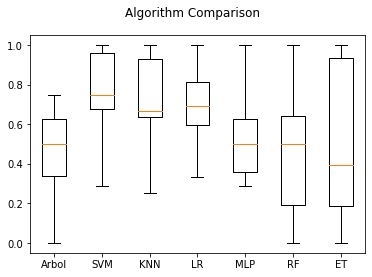

In [46]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.439091 (0.153959)
SVM: 0.685455 (0.150162)
KNN: 0.724545 (0.125971)
LR: 0.687273 (0.110909)
MLP: 0.519091 (0.103449)
RF: 0.488182 (0.113695)
ET: 0.421818 (0.138779)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.967233, p:0.063556
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.787697, p:0.582875
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

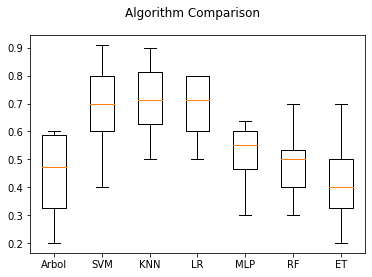

In [47]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [48]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [49]:
from sklearn.manifold import TSNE

In [50]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.634881 (0.209142)
SVM: 0.592560 (0.223117)
KNN: 0.642679 (0.154557)
LR: 0.613036 (0.167980)
MLP: 0.612202 (0.136087)
RF: 0.660357 (0.178705)
ET: 0.726190 (0.177896)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943771, p:0.003468
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.551387, p:0.767055
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

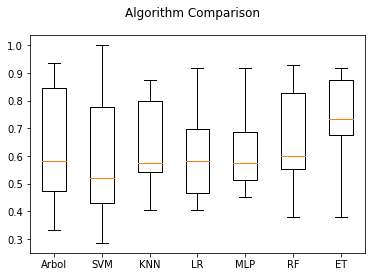

In [51]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.574524 (0.256874)
SVM: 0.590000 (0.320780)
KNN: 0.608333 (0.180624)
LR: 0.569762 (0.235649)
MLP: 0.640000 (0.226961)
RF: 0.626667 (0.204423)
ET: 0.704762 (0.170938)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948609, p:0.006135
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.701893, p:0.649096
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

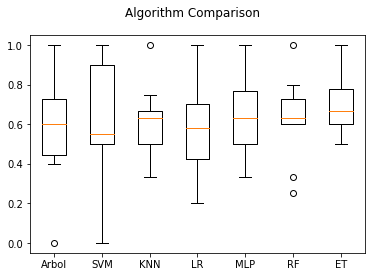

In [52]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.633333 (0.313880)
SVM: 0.457143 (0.281929)
KNN: 0.565476 (0.271222)
LR: 0.596429 (0.233798)
MLP: 0.531548 (0.220737)
RF: 0.654167 (0.250686)
ET: 0.750000 (0.169700)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947973, p:0.005687
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.779352, p:0.589211
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

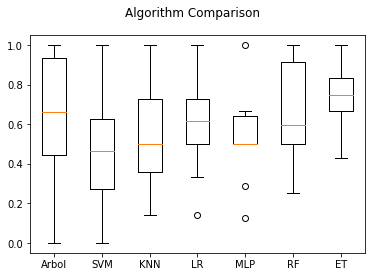

In [53]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.606364 (0.175011)
SVM: 0.604545 (0.212978)
KNN: 0.618182 (0.155239)
LR: 0.606364 (0.163437)
MLP: 0.585455 (0.170376)
RF: 0.646364 (0.148014)
ET: 0.723636 (0.154556)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.958021, p:0.019492
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.509775, p:0.798717
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

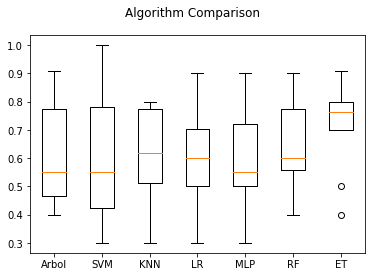

In [54]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [55]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.531667 (0.155168)
SVM: 0.491786 (0.194788)
KNN: 0.410833 (0.191727)
LR: 0.609345 (0.170536)
MLP: 0.459226 (0.169701)
RF: 0.507202 (0.146199)
ET: 0.476726 (0.162489)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.955136, p:0.013591
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.296978, p:0.936134
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

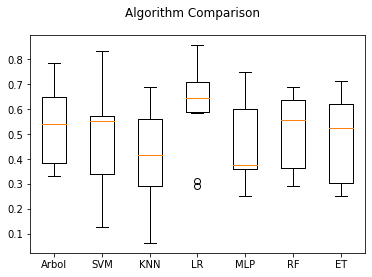

In [56]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.532738 (0.280524)
SVM: 0.488095 (0.382919)
KNN: 0.390952 (0.321761)
LR: 0.624167 (0.304456)
MLP: 0.438889 (0.411411)
RF: 0.515794 (0.283387)
ET: 0.433016 (0.324047)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.896781, p:0.000029
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.512085, p:0.796983
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

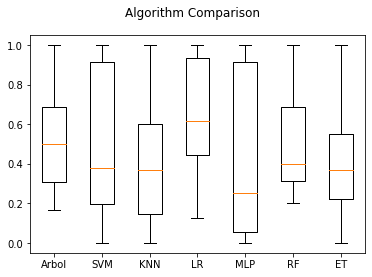

In [57]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.538690 (0.276478)
SVM: 0.410119 (0.309552)
KNN: 0.336310 (0.206493)
LR: 0.562500 (0.262003)
MLP: 0.292857 (0.225072)
RF: 0.500595 (0.215052)
ET: 0.413095 (0.192699)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939525, p:0.002130
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.484159, p:0.817721
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

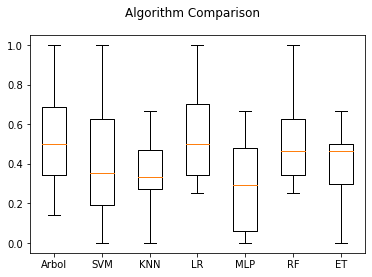

In [58]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.450000 (0.127354)
SVM: 0.420909 (0.169737)
KNN: 0.371818 (0.167157)
LR: 0.556364 (0.178460)
MLP: 0.440909 (0.180369)
RF: 0.439091 (0.123920)
ET: 0.398182 (0.172334)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.961096, p:0.028788
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.788289, p:0.582426
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

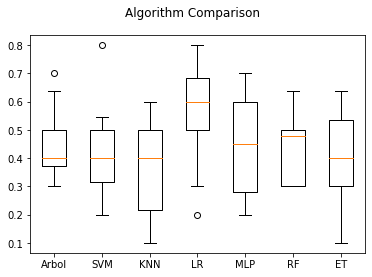

In [59]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [60]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [19]:
from umap import UMAP

In [62]:
reducer = UMAP()

In [63]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.589524 (0.224475)
SVM: 0.578690 (0.150075)
KNN: 0.611369 (0.172877)
LR: 0.593571 (0.136051)
MLP: 0.522440 (0.197028)
RF: 0.658690 (0.240529)
ET: 0.641131 (0.194945)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.977554, p:0.241049
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.228048, p:0.304058
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

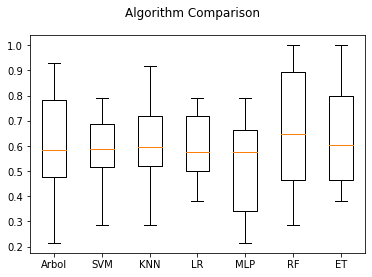

In [64]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.576310 (0.285092)
SVM: 0.572381 (0.225420)
KNN: 0.598333 (0.188092)
LR: 0.596190 (0.247615)
MLP: 0.513056 (0.258483)
RF: 0.635476 (0.297799)
ET: 0.622857 (0.209695)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962176, p:0.033054
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.341259, p:0.912375
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

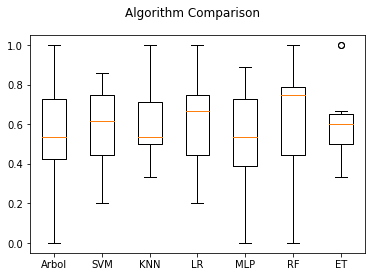

In [65]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.562500 (0.281482)
SVM: 0.626190 (0.207785)
KNN: 0.638690 (0.219933)
LR: 0.555952 (0.186267)
MLP: 0.601190 (0.295048)
RF: 0.629167 (0.296618)
ET: 0.662500 (0.226223)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.914420, p:0.000151
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.457439, p:0.837034
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

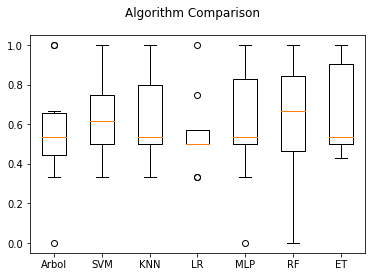

In [66]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.610000 (0.187918)
SVM: 0.598182 (0.128166)
KNN: 0.629091 (0.139290)
LR: 0.578182 (0.109333)
MLP: 0.559091 (0.189530)
RF: 0.680909 (0.210566)
ET: 0.629091 (0.171469)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.966426, p:0.057226
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.167235, p:0.335173
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

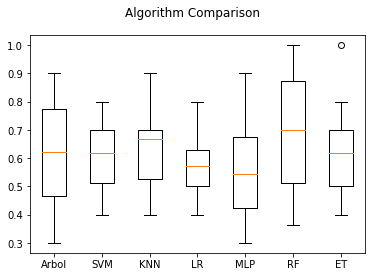

In [67]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [68]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [20]:
reducer = UMAP(n_components=10)

In [21]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.631607 (0.101895)
SVM: 0.654405 (0.172055)
KNN: 0.639821 (0.180044)
LR: 0.644762 (0.152745)
MLP: 0.610833 (0.156056)
RF: 0.678036 (0.117335)
ET: 0.698869 (0.133770)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.975158, p:0.177876
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.677885, p:0.667935
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

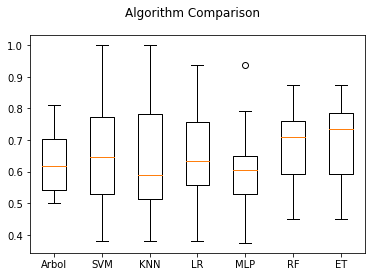

In [71]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.580119 (0.207107)
SVM: 0.624524 (0.241258)
KNN: 0.661667 (0.255718)
LR: 0.626667 (0.254427)
MLP: 0.569762 (0.278942)
RF: 0.636905 (0.205738)
ET: 0.669048 (0.195534)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939983, p:0.002244
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.202440, p:0.974821
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

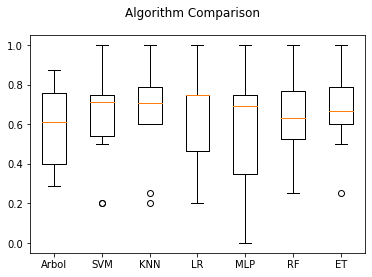

In [72]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.755357 (0.145425)
SVM: 0.664286 (0.187234)
KNN: 0.597619 (0.178238)
LR: 0.604167 (0.158321)
MLP: 0.585119 (0.234467)
RF: 0.701190 (0.148638)
ET: 0.701190 (0.148638)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.950097, p:0.007336
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.179683, p:0.981426
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

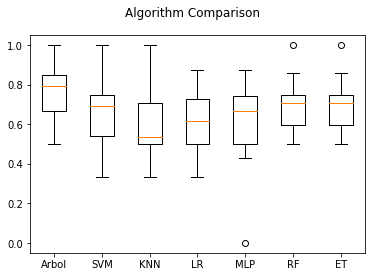

In [73]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.616364 (0.132228)
SVM: 0.644545 (0.159361)
KNN: 0.675455 (0.100991)
LR: 0.656364 (0.169042)
MLP: 0.684545 (0.139778)
RF: 0.676364 (0.152402)
ET: 0.725455 (0.084580)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.944713, p:0.003870
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.849740, p:0.536693
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

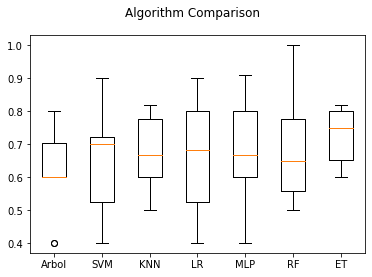

In [22]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.493333 (0.095411)
SVM: 0.542321 (0.154314)
KNN: 0.524762 (0.104206)
LR: 0.556488 (0.177798)
MLP: 0.518988 (0.163794)
RF: 0.540417 (0.094002)
ET: 0.559107 (0.094407)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979771, p:0.316777
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.652645, p:0.147613
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

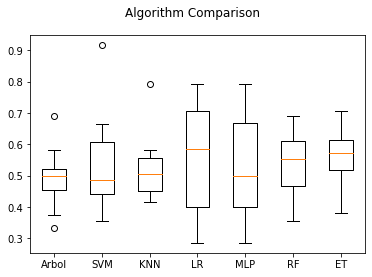

In [23]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.396389 (0.268995)
SVM: 0.504167 (0.243163)
KNN: 0.519444 (0.188260)
LR: 0.531429 (0.239313)
MLP: 0.481429 (0.284844)
RF: 0.504444 (0.274287)
ET: 0.550238 (0.226303)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.916244, p:0.000181
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.274720, p:0.946796
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

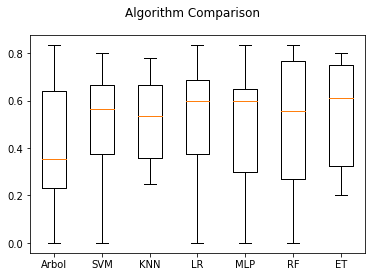

In [24]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.461905 (0.287780)
SVM: 0.556548 (0.308437)
KNN: 0.573214 (0.193430)
LR: 0.562500 (0.273981)
MLP: 0.495833 (0.276001)
RF: 0.520238 (0.263203)
ET: 0.630357 (0.205619)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951292, p:0.008478
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.397587, p:0.877877
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

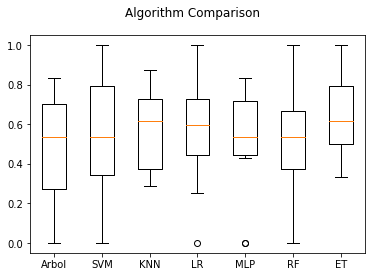

In [25]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.489091 (0.110879)
SVM: 0.538182 (0.143556)
KNN: 0.549091 (0.118336)
LR: 0.577273 (0.128066)
MLP: 0.577273 (0.135650)
RF: 0.540000 (0.090106)
ET: 0.560000 (0.113196)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.940560, p:0.002396
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.366342, p:0.897553
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

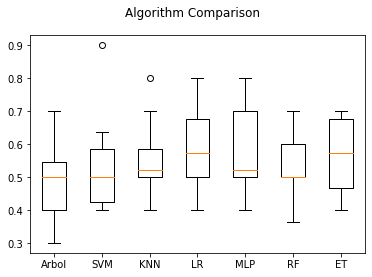

In [26]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.625060 (0.178524)
SVM: 0.570536 (0.066337)
KNN: 0.687560 (0.147550)
LR: 0.627440 (0.101724)
MLP: 0.634286 (0.106315)
RF: 0.644107 (0.148000)
ET: 0.665238 (0.171602)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979548, p:0.308329
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.417655, p:0.221961
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

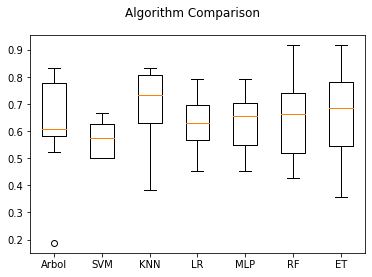

In [27]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.618929 (0.188073)
SVM: 0.387500 (0.356239)
KNN: 0.730833 (0.264734)
LR: 0.600595 (0.293790)
MLP: 0.565476 (0.240494)
RF: 0.615833 (0.261259)
ET: 0.618810 (0.264533)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.920838, p:0.000287
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.627063, p:0.707960
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

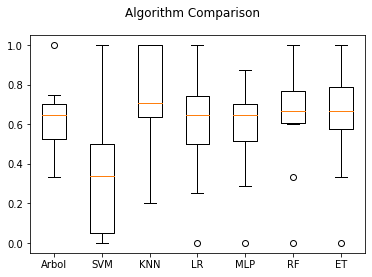

In [28]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.691071 (0.214128)
SVM: 0.500000 (0.434613)
KNN: 0.596429 (0.215634)
LR: 0.544048 (0.243745)
MLP: 0.741071 (0.284935)
RF: 0.641667 (0.280834)
ET: 0.644048 (0.310093)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.913000, p:0.000132
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.901062, p:0.094481
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

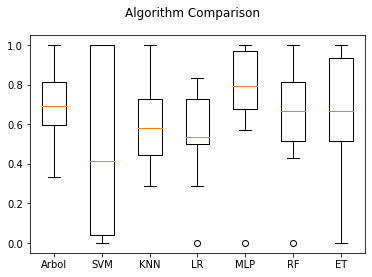

In [29]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.628182 (0.136512)
SVM: 0.420000 (0.159119)
KNN: 0.654545 (0.157197)
LR: 0.636364 (0.091814)
MLP: 0.666364 (0.101725)
RF: 0.645455 (0.121764)
ET: 0.636364 (0.147430)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.949584, p:0.006896
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.864335, p:0.526096
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

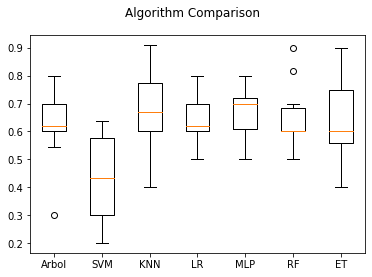

In [30]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.589524 (0.113279)
SVM: 0.580000 (0.136367)
KNN: 0.550714 (0.162354)
LR: 0.612024 (0.163988)
MLP: 0.568274 (0.153787)
RF: 0.513929 (0.179956)
ET: 0.581071 (0.137999)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.987344, p:0.706468
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.092054, p:0.996922
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

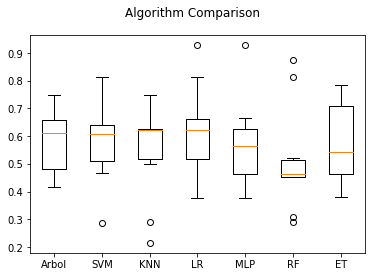

In [31]:
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.595000 (0.259492)
SVM: 0.555000 (0.158888)
KNN: 0.533810 (0.172660)
LR: 0.603333 (0.193333)
MLP: 0.563333 (0.239884)
RF: 0.487381 (0.221293)
ET: 0.568571 (0.234404)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948653, p:0.006168
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.636424, p:0.700588
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

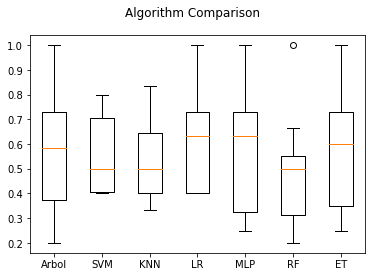

In [32]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.516667 (0.222157)
SVM: 0.726190 (0.188982)
KNN: 0.672619 (0.254731)
LR: 0.620238 (0.195937)
MLP: 0.620238 (0.246198)
RF: 0.523214 (0.220197)
ET: 0.562500 (0.202578)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.916026, p:0.000177
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.297100, p:0.936073
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

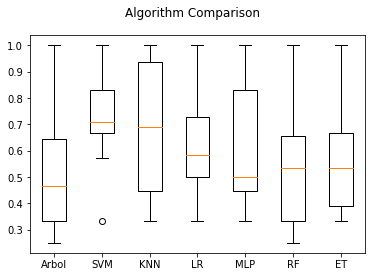

In [33]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.569091 (0.072750)
SVM: 0.609091 (0.119018)
KNN: 0.570000 (0.162829)
LR: 0.618182 (0.126883)
MLP: 0.550909 (0.153214)
RF: 0.500909 (0.146330)
ET: 0.550000 (0.113636)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.965687, p:0.051990
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.622176, p:0.711807
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

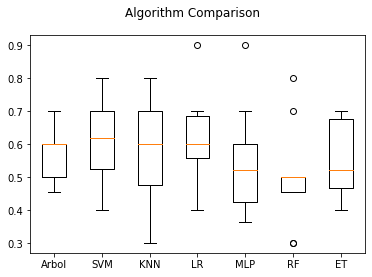

In [34]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.557083 (0.127544)
SVM: 0.663750 (0.086304)
KNN: 0.706607 (0.166654)
LR: 0.680714 (0.138249)
MLP: 0.675357 (0.131825)
RF: 0.733690 (0.130467)
ET: 0.697798 (0.171536)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983534, p:0.488352
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.595982, p:0.163111
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

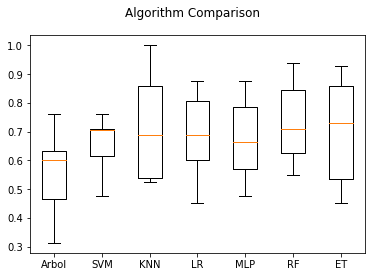

In [35]:
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.566190 (0.186852)
SVM: 0.635476 (0.194419)
KNN: 0.668333 (0.208292)
LR: 0.642262 (0.157231)
MLP: 0.677262 (0.209256)
RF: 0.677500 (0.160643)
ET: 0.660317 (0.155738)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951391, p:0.008580
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.199608, p:0.975702
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

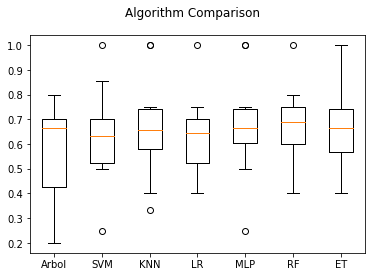

In [36]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.576786 (0.127009)
SVM: 0.647619 (0.222985)
KNN: 0.747619 (0.218983)
LR: 0.710714 (0.233349)
MLP: 0.625000 (0.178194)
RF: 0.787500 (0.183890)
ET: 0.752381 (0.226115)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.932535, p:0.000980
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.565777, p:0.755930
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

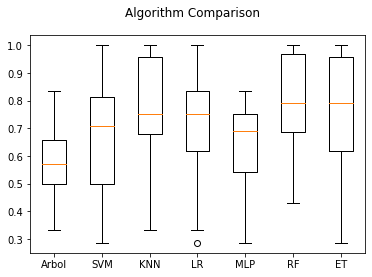

In [37]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.599091 (0.106052)
SVM: 0.665455 (0.104668)
KNN: 0.706364 (0.150813)
LR: 0.666364 (0.119783)
MLP: 0.685455 (0.124860)
RF: 0.717273 (0.124545)
ET: 0.676364 (0.152402)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.961758, p:0.031331
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.595266, p:0.732940
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

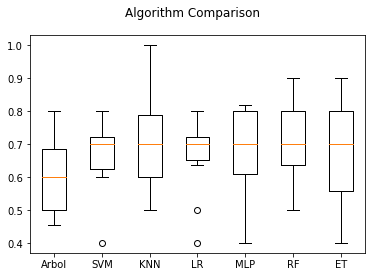

In [38]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.614107 (0.182826)
SVM: 0.513095 (0.113589)
KNN: 0.483095 (0.026480)
LR: 0.487202 (0.098278)
MLP: 0.511845 (0.098569)
RF: 0.654464 (0.098363)
ET: 0.547024 (0.126751)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.927299, p:0.000560
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.657469, p:0.023145
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

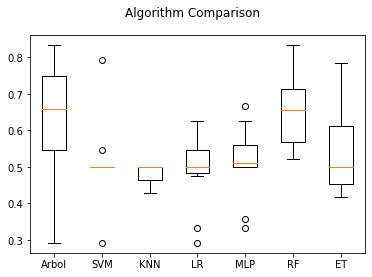

In [39]:
clf = manifold.LocallyLinearEmbedding(10, n_components=100,method='standard')
X_lle100 = clf.fit_transform(X)
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563532 (0.244775)
SVM: 0.282879 (0.298484)
KNN: 0.480606 (0.188002)
LR: 0.447273 (0.323945)
MLP: 0.523333 (0.318460)
RF: 0.682738 (0.285988)
ET: 0.418571 (0.335932)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938099, p:0.001814
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.446123, p:0.845032
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

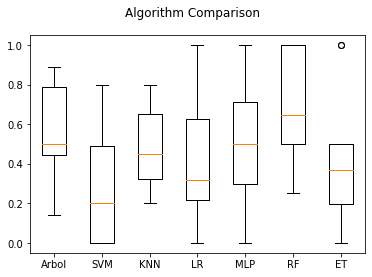

In [40]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.703571 (0.273781)
SVM: 0.466667 (0.434933)
KNN: 0.892857 (0.184197)
LR: 0.474405 (0.390796)
MLP: 0.617262 (0.364255)
RF: 0.581548 (0.147062)
ET: 0.428571 (0.282923)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.885953, p:0.000011
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.595042, p:0.003968
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

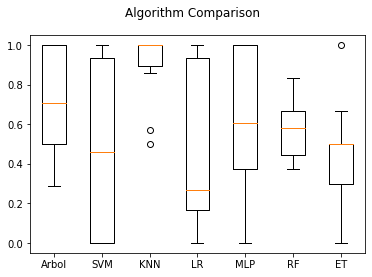

In [41]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.630000 (0.210786)
SVM: 0.487273 (0.212626)
KNN: 0.452727 (0.170696)
LR: 0.351818 (0.120059)
MLP: 0.460000 (0.151040)
RF: 0.617273 (0.107600)
ET: 0.458182 (0.153698)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947745, p:0.005535
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.800938, p:0.113264
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

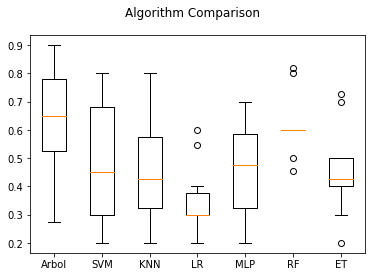

In [42]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# MDS

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.378929 (0.116222)
SVM: 0.386190 (0.191819)
KNN: 0.477202 (0.129593)
LR: 0.411845 (0.111417)
MLP: 0.442679 (0.139188)
RF: 0.407798 (0.135778)
ET: 0.432321 (0.151368)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.978277, p:0.263772
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.518861, p:0.791879
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

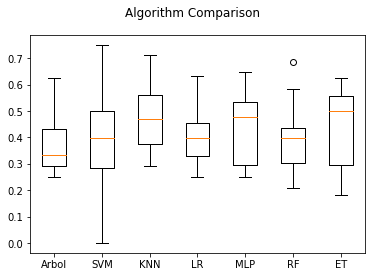

In [43]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.394048 (0.279113)
SVM: 0.362511 (0.287070)
KNN: 0.477619 (0.351629)
LR: 0.385952 (0.237226)
MLP: 0.268333 (0.229909)
RF: 0.393333 (0.240884)
ET: 0.448939 (0.307367)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.925205, p:0.000449
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.674933, p:0.670256
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

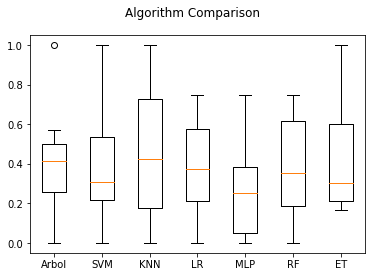

In [44]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.335714 (0.214867)
SVM: 0.426190 (0.269889)
KNN: 0.335714 (0.140940)
LR: 0.373214 (0.203395)
MLP: 0.354167 (0.327687)
RF: 0.460119 (0.274250)
ET: 0.399405 (0.319953)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.931906, p:0.000916
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.970574, p:0.452526
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

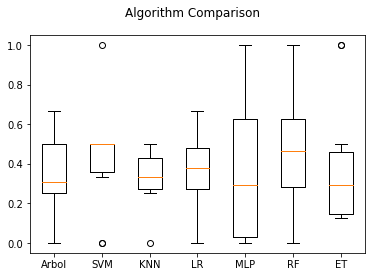

In [45]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.409091 (0.088327)
SVM: 0.354545 (0.158662)
KNN: 0.441818 (0.089369)
LR: 0.390000 (0.120909)
MLP: 0.360000 (0.118823)
RF: 0.411818 (0.112231)
ET: 0.335455 (0.105896)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.946097, p:0.004553
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.742222, p:0.617704
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

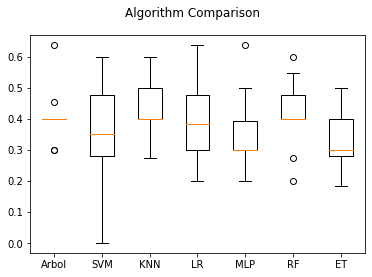

In [46]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.444940 (0.194385)
SVM: 0.538750 (0.172709)
KNN: 0.503333 (0.136136)
LR: 0.416905 (0.197749)
MLP: 0.467083 (0.185671)
RF: 0.364226 (0.160836)
ET: 0.439226 (0.155772)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.972581, p:0.127531
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.446499, p:0.844768
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

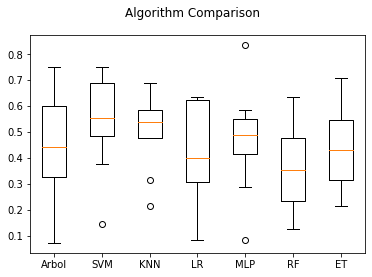

In [47]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.530952 (0.302613)
SVM: 0.542143 (0.283795)
KNN: 0.507143 (0.289469)
LR: 0.390000 (0.301588)
MLP: 0.487381 (0.299951)
RF: 0.373333 (0.241595)
ET: 0.412222 (0.278109)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.925793, p:0.000478
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.164308, p:0.985272
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

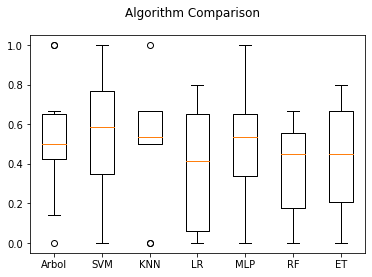

In [48]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.396429 (0.198781)
SVM: 0.488095 (0.289753)
KNN: 0.332143 (0.206914)
LR: 0.391667 (0.313548)
MLP: 0.375595 (0.240176)
RF: 0.379762 (0.246198)
ET: 0.404762 (0.311850)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.932730, p:0.001002
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.740982, p:0.618663
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

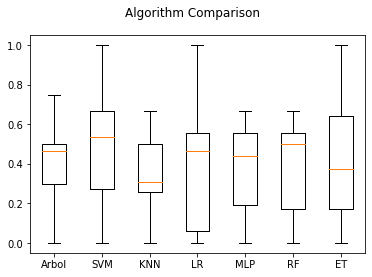

In [49]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.457273 (0.185866)
SVM: 0.509091 (0.155983)
KNN: 0.500000 (0.135695)
LR: 0.428182 (0.167058)
MLP: 0.495455 (0.223431)
RF: 0.380909 (0.140862)
ET: 0.420000 (0.146010)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.971730, p:0.114186
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.459940, p:0.835251
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

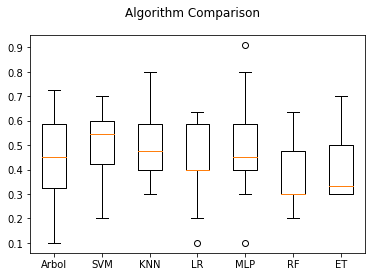

In [50]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.532560 (0.081786)
SVM: 0.655595 (0.129509)
KNN: 0.615298 (0.160876)
LR: 0.590357 (0.137197)
MLP: 0.579107 (0.063653)
RF: 0.632083 (0.111661)
ET: 0.619167 (0.153704)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.988567, p:0.777616
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.377299, p:0.237633
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

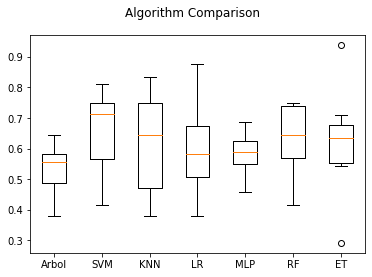

In [51]:
clf = manifold.MDS(n_components=100, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.530714 (0.244167)
SVM: 0.665000 (0.250161)
KNN: 0.628333 (0.167008)
LR: 0.576429 (0.202486)
MLP: 0.563810 (0.206141)
RF: 0.651667 (0.308801)
ET: 0.650238 (0.285664)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.918623, p:0.000229
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.383368, p:0.235216
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

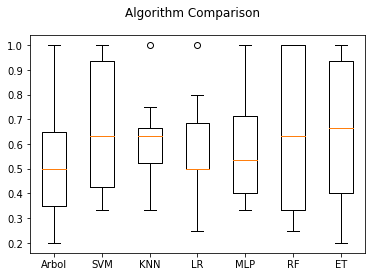

In [52]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.479762 (0.174318)
SVM: 0.577381 (0.186054)
KNN: 0.589881 (0.229864)
LR: 0.597619 (0.138505)
MLP: 0.591071 (0.145317)
RF: 0.548810 (0.215371)
ET: 0.515476 (0.293304)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.937096, p:0.001621
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.641606, p:0.696505
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

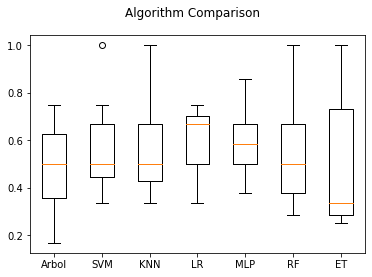

In [53]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.530909 (0.086359)
SVM: 0.607273 (0.121750)
KNN: 0.597273 (0.151360)
LR: 0.608182 (0.121114)
MLP: 0.569091 (0.075098)
RF: 0.568182 (0.091746)
ET: 0.535455 (0.157115)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956943, p:0.017023
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.747847, p:0.613359
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

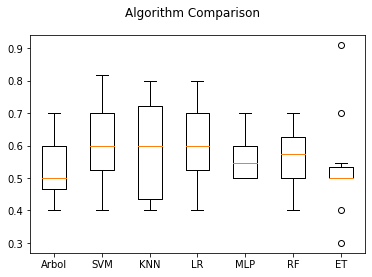

In [54]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='accuracy')